<a href="https://colab.research.google.com/github/rldckd0103/pdm02/blob/master/py-tensorflow/tf2_1_datasets_cv_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CV (Computer vision) datasets-1 in AI
> https://www.tensorflow.org/api_docs/python/tf/keras/datasets  
- from keras
    - MNIST
    - Fashion-MNIST
    -  ...



## MNIST (Modified National Institute of Standards and Technology)
> http://yann.lecun.com/exdb/mnist/

- (60000, 28, 28), train
- (10000, 28, 28), test
- grayscale images of handwritten single digits between 0 and 9

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.3.0


In [2]:
from keras.datasets import mnist
# from tensorflow.keras.datasets import mnist

In [3]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# 데이터를 담는 변수 이름을 대, 소문자로 구분하는 이유는?

11493376/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


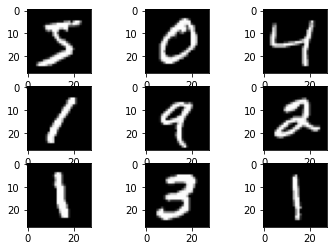

In [4]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

### MNIST trainset

In [7]:
type(trainy), trainX.shape, trainy.shape

(numpy.ndarray, (60000, 28, 28), (60000,))

#### 각 숫자의 빈도

In [11]:
unique, counts = np.unique(trainy, return_counts=True)
print(unique, counts)
mnist_train_dic = dict(zip(unique, counts))
mnist_train_dic

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

<BarContainer object of 10 artists>

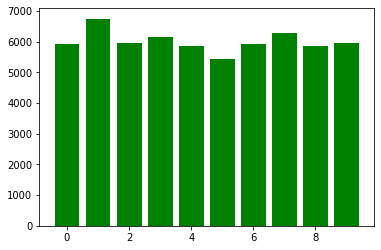

In [12]:
# Bar chart of counts of each number in MNIST trainset
plt.bar(list(mnist_train_dic.keys()), mnist_train_dic.values(), color='g')

#### 트레인데이터에서 무작위로 숫자 하나 선택해서 출력

In [14]:
trainX.shape, trainX.shape[0]

((60000, 28, 28), 60000)

6209


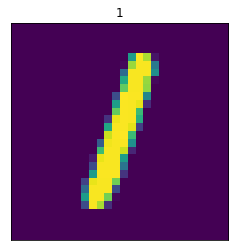

In [23]:
# display one random image from our training set:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

idx = np.random.randint(0, trainX.shape[0])
print(idx)
image = trainX[idx]
plt.imshow(image)
plt.title(class_names[trainy[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

#### 대표 숫자 그림 출력

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


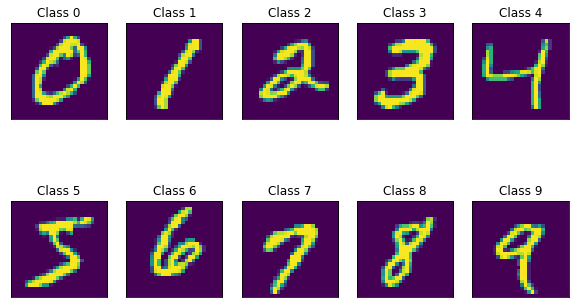

In [26]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = trainX[trainy == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0])#, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])



### [DIY] MNIST trainset에서 각 숫자가 출현하는 첫 인덱스를 이용해서 대표숫자를 출력하시오.

Text(0.5, 0.98, '10 different numbers')

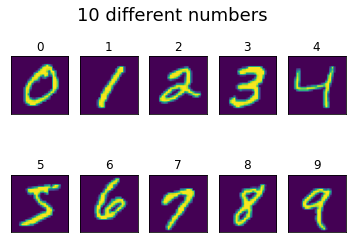

In [27]:
# Your code here!
class_names = ["0","1","2","3","4","5","6","7","8","9"]
num_10 = np.unique(trainy, return_index=True)[1]
# num_10[1]
images = trainX[num_10]
for i in range(len(images)):
    # define subplot
    plt.subplot(2,5,1 + i) #, sharey=False)
    # plot raw pixel data
    plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])
plt.suptitle("10 different numbers", fontsize=18)

### MNIST test set

In [28]:
# import numpy as np
print(type(testy))
unique, counts = np.unique(testy, return_counts=True)
mnist_test_dic = dict(zip(unique, counts))
mnist_test_dic

<class 'numpy.ndarray'>


{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

<BarContainer object of 10 artists>

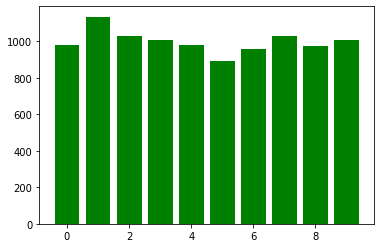

In [29]:
# Bar chart of counts of each number in MNIST trainset
plt.bar(list(mnist_test_dic.keys()), mnist_test_dic.values(), color='g')

#### 테스트데이터에서 무작위로 숫자 하나 선택해서 출력

In [30]:
# Your code here!
testX.shape, testX.shape[0]

((10000, 28, 28), 10000)

8298


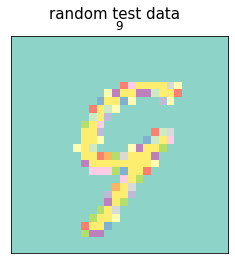

In [31]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

idx = np.random.randint(0, testX.shape[0])
print(idx)
image = testX[idx]
plt.imshow((image),cmap=plt.get_cmap('Set3'))
plt.title(class_names[testy[idx]])
plt.xticks([]) # x 라벨
plt.yticks([]) # y 라벨
plt.suptitle("random test data", fontsize=15)
plt.show()

#### 대표 숫자 그림 출력

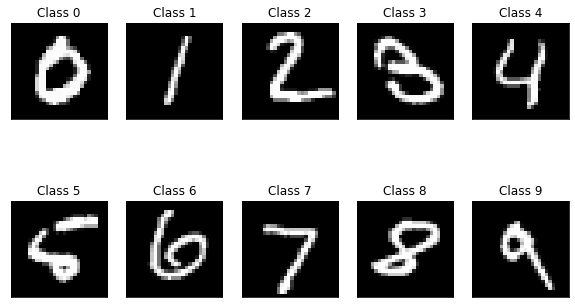

In [32]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = testX[testy == i]
    plt.imshow(num0_9[0], cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])



### [DIY] MNIST testset에서 각 숫자가 출현하는 첫 인덱스를 이용해서 대표숫자를 출력하시오.

(10, 28, 28)


Text(0.5, 0.98, 'first number in testset')

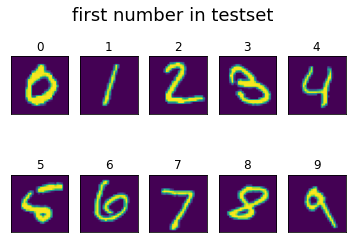

In [33]:
# Your code!
class_names = ["0","1","2","3","4","5","6","7","8","9"]
num_10 = np.unique(testy, return_index=True)[1] #[1]
images = testX[num_10]
print(images.shape)
for i in range(len(images)):
    # define subplot
    plt.subplot(2,5,1 + i)
    # plot raw pixel data
    plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])
plt.suptitle("first number in testset", fontsize=18)

***

## Fashion-MNIST Dataset
- (60000, 28, 28), train
- (10000, 28, 28), test
- grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more.

### class names
- class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [34]:
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))


4423680/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


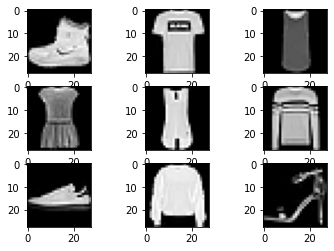

In [35]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

Fashion MNIST trainset

In [36]:
type(trainy), trainy.shape

(numpy.ndarray, (60000,))

In [37]:
trainy[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

#### 각 패션의 빈도

In [38]:
unique, counts = np.unique(trainy, return_counts=True)
print(unique, counts)
fmnist_train_dic = dict(zip(unique, counts))
fmnist_train_dic

[0 1 2 3 4 5 6 7 8 9] [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

<BarContainer object of 10 artists>

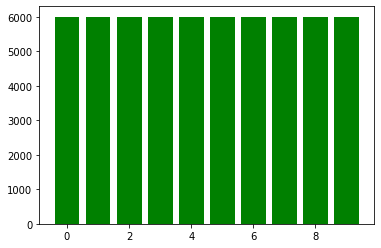

In [39]:
# Bar chart of counts of each fashion in fMNIST trainset
plt.bar(list(fmnist_train_dic.keys()), fmnist_train_dic.values(), color='g')

#### 트레인데이터에서 무작위로 하나의 패션 선택해서 출력

47145


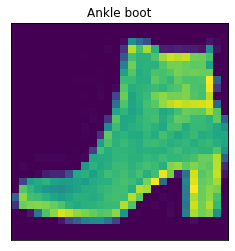

In [40]:
# display one random image from our training set:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

idx = np.random.randint(0, trainX.shape[0])
print(idx)
image = trainX[idx]
plt.imshow(image)
plt.title(class_names[trainy[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

In [42]:
trainy[idx]

9

#### 대표 패션 그림 출력

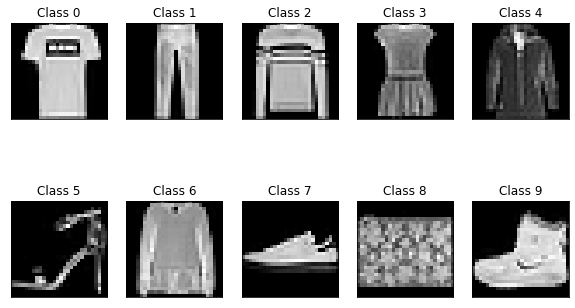

In [41]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = trainX[trainy == i]
    plt.imshow(num0_9[0], cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])



### [DIY] fMNIST trainset에서 각 패션이 출현하는 첫 인덱스를 이용해서 대표패션를 출력하시오.

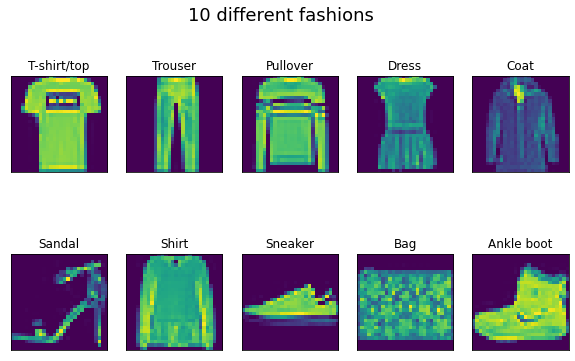

In [43]:
# Your code here!
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_10 = np.unique(trainy, return_index=True)[1]
images = trainX[num_10]
fig = plt.figure(figsize=(10,6))
for i in range(len(images)):
    # define subplot
    plt.subplot(2,5,1 + i) #, sharey=False)
    # plot raw pixel data
    plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])
plt.suptitle("10 different fashions", fontsize=18)
plt.show()

### fMNIST test set

In [44]:
# import numpy as np
print(type(testy))
unique, counts = np.unique(testy, return_counts=True)
fmnist_test_dic = dict(zip(unique, counts))
fmnist_test_dic

<class 'numpy.ndarray'>


{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

<BarContainer object of 10 artists>

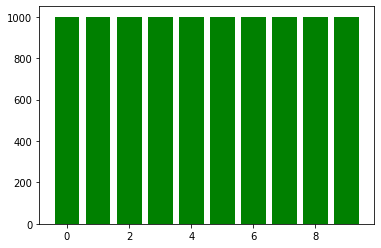

In [45]:
# Bar chart of counts of each fashion in fMNIST trainset
plt.bar(list(fmnist_test_dic.keys()), fmnist_test_dic.values(), color='g')

#### 테스트데이터에서 무작위로 패션 하나 선택해서 출력

6849


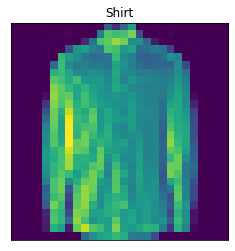

In [46]:
# Your code here!
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

idx = np.random.randint(0, testX.shape[0])
print(idx)
image = testX[idx]
plt.imshow(image)
plt.title(class_names[testy[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

#### 대표 패션 그림 출력

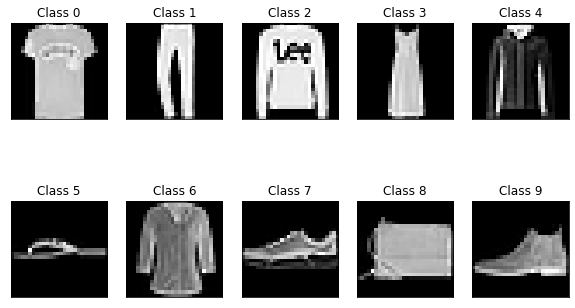

In [47]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = testX[testy == i]
    plt.imshow(num0_9[0], cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])



### [DIY] fMNIST testset에서 각 패션이 출현하는 첫 인덱스를 이용해서 대표패션을 출력하시오.

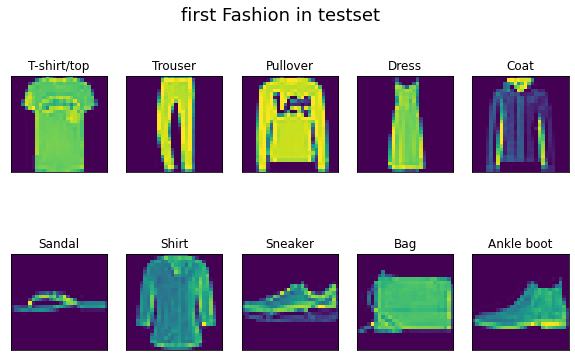

In [48]:
# Your code!
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_10 = np.unique(testy, return_index=True)[1]
images = testX[num_10]
fig = plt.figure(figsize=(10,6))
for i in range(len(images)):
    # define subplot
    plt.subplot(2,5,1 + i)
    # plot raw pixel data
    plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])
plt.suptitle("first Fashion in testset", fontsize=18)
plt.show()



---



---

